# Losses can have non optimal local minimas

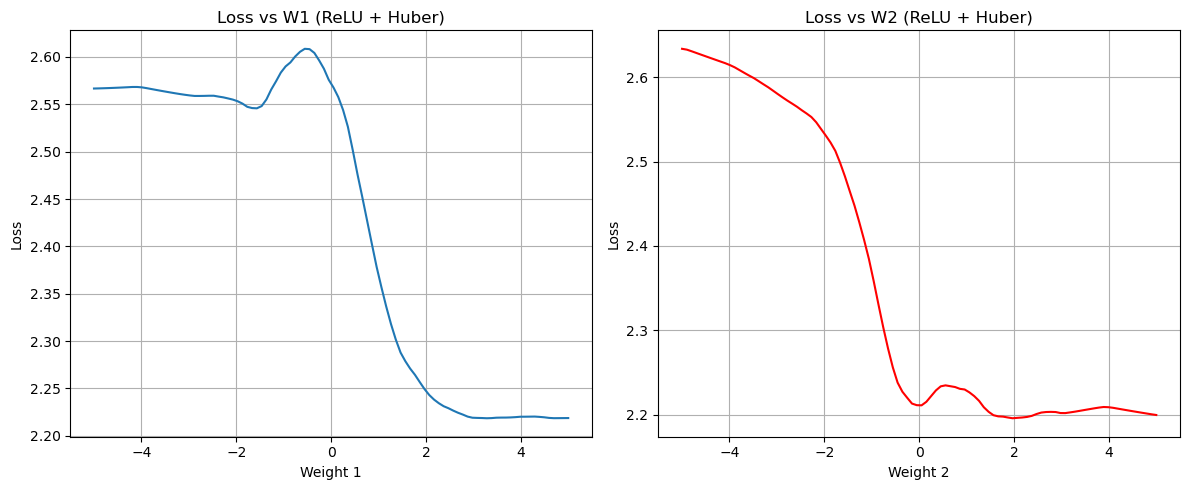

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset: y = 4 + 2*x1 + 3*x2 + noise
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  
y = 4 + 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5  

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = 0.5 * (error ** 2)
    linear = delta * (abs_error - 0.5 * delta)
    return np.mean(np.where(abs_error < delta, quadratic, linear))

# Loss function with non-linearity
def compute_loss(w1, w2, X, y):
    b1, b2 = 0.5, -0.5  
    W_out = np.array([[2.0], [-2.0]])  
    b_out = 0.3  

    hidden_input = np.dot(X, np.array([[w1, w2]]).T) + np.array([[b1, b2]])
    hidden_output = relu(hidden_input)  
    final_output = np.dot(hidden_output, W_out) + b_out  

    return huber_loss(y, final_output.flatten(), delta=1.0)

# Generate weight range
w_values = np.linspace(-5, 5, 100)
loss_w1 = np.zeros(100)
loss_w2 = np.zeros(100)

fixed_w1, fixed_w2 = 1.0, -1.0  

# Compute loss for individual weights
for i, w in enumerate(w_values):
    loss_w1[i] = compute_loss(w, fixed_w2, X, y)
    loss_w2[i] = compute_loss(fixed_w1, w, X, y)

# Plot Loss vs W1 and W2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(w_values, loss_w1, label="Loss w.r.t W1")
axes[0].set_xlabel("Weight 1")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs W1 (ReLU + Huber)")
axes[0].grid()

axes[1].plot(w_values, loss_w2, label="Loss w.r.t W2", color='r')
axes[1].set_xlabel("Weight 2")
axes[1].set_ylabel("Loss")
axes[1].set_title("Loss vs W2 (ReLU + Huber)")
axes[1].grid()

plt.tight_layout()
plt.show()



GD

In [51]:
import pandas as pd

In [52]:
x1 = np.random.randint(low=0, high=20, size=2000)
x2 = np.random.randint(low=0, high=20, size=2000)
y = 3 + 2*x1 - 4*x2 + np.random.random(2000)

In [53]:
x1

array([15,  6,  4, ..., 19, 16,  6])

In [54]:
x2

array([ 3, 13,  2, ...,  8, 12, 15])

In [55]:
y

array([ 21.54723752, -36.00822712,   3.66420171, ...,   9.60289288,
       -12.34577954, -44.00180009])

In [56]:
x = pd.DataFrame({'intercept': np.ones(2000), 'x1':x1, 'x2':x2})

In [57]:
x

,intercept,x1,x2
0,1.0,15,3
1,1.0,6,13
2,1.0,4,2
3,1.0,2,4
4,1.0,11,15
...,...,...,...
1995,1.0,3,9
1996,1.0,12,1
1997,1.0,19,8
1998,1.0,16,12


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
sk_model = LinearRegression()

In [60]:
sk_model.fit(pd.DataFrame({'x1':x1, 'x2':x2}), y)

LinearRegression()

In [61]:
sk_w = [sk_model.intercept_, list(sk_model.coef_)]

In [62]:
sk_w

[3.4881991123427163, [1.9997829911313432, -3.9995634672882687]]

In [63]:
w = np.random.random(x.shape[1])

In [64]:
w

array([0.07496004, 0.22300982, 0.40789594])

In [65]:
def my_pred(x,w):
    preds = x@w
    return preds

In [66]:
def my_error(y,x,w):
    error = y - my_pred(x,w)
    return error

In [67]:
def my_cost(y,x,w):
    error = my_error(y,x,w)
    cost = error.T@error
    return cost

In [68]:
def grad(y,x,w):
    error = my_error(y,x,w)
    grad = -x.T@error/x.shape[0]
    return np.array(grad)

In [69]:
grad(y,x,w)

array([ 22.24257601, 146.87012207, 361.61349414])

In [70]:
def lr_gd(y,x,learning_rate, num_steps):
    wts = np.random.random(x.shape[1])
    cost = []
    for i in range(num_steps):
        wts -= learning_rate*grad(y,x,wts)  
          
        # if i %100==0:
        #     print(my_cost(y,x,wts), wts)
        cost.append(my_cost(y,x,wts))
    return cost, wts

In [71]:
cost_gd, w_gd = lr_gd(y,x,0.0001, 1000)

In [79]:
w_gd

array([ 0.31279559,  2.03717556, -3.75612406])

In [78]:
cost_gd

[1974062.8001249656,
 1934403.1718457944,
 1896124.0556052495,
 1859169.1318727725,
 1823484.4465528214,
 1789018.3111611952,
 1755721.2072172458,
 1723545.6946738996,
 1692446.3242149435,
 1662379.5532562246,
 1633303.665494318,
 1605178.6938528204,
 1577966.3466827665,
 1551629.9370797086,
 1526134.3151858305,
 1501445.8033510002,
 1477532.1340320166,
 1454362.3903143848,
 1431906.9489458557,
 1410137.4257756353,
 1389026.6234976556,
 1368548.4816005845,
 1348678.0284313716,
 1329391.3352830545,
 1310665.47242133,
 1292478.4669679971,
 1274809.2625628468,
 1257637.680728875,
 1240944.3838688834,
 1224710.8398245545,
 1208919.2879320127,
 1193552.7065106588,
 1178594.7817247454,
 1164029.8777597104,
 1149843.0082577355,
 1136019.80895935,
 1122546.5115001327,
 1109409.9183137333,
 1096597.3785944767,
 1084096.7652748069,
 1071896.4529746985,
 1059985.2968819926,
 1048352.6125243307,
 1036988.1563950345,
 1025882.107396861,
 1015025.0490690933,
 1004407.9525648793,
 994022.1603471317,


In [72]:
sk_w

[3.4881991123427163, [1.9997829911313432, -3.9995634672882687]]

In [73]:
w_gd

array([ 0.31279559,  2.03717556, -3.75612406])

In [74]:
grad(y,x,w_gd)

array([-0.48903716, -3.46267135,  3.4196773 ])

In [75]:
def lr_sgd(y,x,learning_rate, num_steps):
    wts = np.random.random(x.shape[1])
    cost = []
    for i in range(num_steps):
        rand_ind = np.random.choice(range(x.shape[0]), 10)
          
        y_sub = y[rand_ind]
        x_sub = x.iloc[rand_ind,:]
        wts -= learning_rate*grad(y,x,wts)  
        cost.append(my_cost(y,x,wts))
    return cost, wts

In [76]:
cost_sgd, w_sgd = lr_sgd(y, x, 0.0001, 1000)

In [77]:
w_sgd

array([ 0.5837457 ,  2.03289067, -3.77582915])

<Axes: >

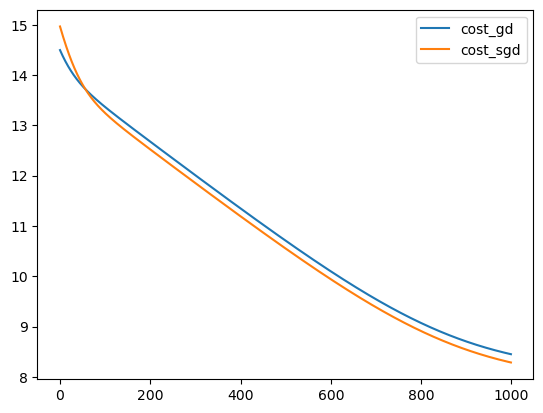

In [81]:
pd.DataFrame({'cost_gd':np.log(cost_gd), 'cost_sgd':np.log(cost_sgd)}).plot()

In [82]:
def lr_sgd_mom(y,x,learning_rate, num_steps, gamma):
    wts = np.random.random(x.shape[1])
    cost = []
    gamma = 0.9
    v = np.zeros(x.shape[1])
    for i in range(num_steps):
        rand_ind = np.random.choice(range(x.shape[0]), 10)
        y_sub = y[rand_ind]
        x_sub = x.iloc[rand_ind,:]
        v = gamma*v + (1-gamma)*grad(y,x,wts)
        wts -= learning_rate*v  
        cost.append(my_cost(y,x,wts))
    return cost, wts

In [83]:
cost_sgd_mom, w_sgd_mom = lr_sgd_mom(y, x, 0.0001, 1000, 0.9)

In [86]:
w_sgd_mom

array([ 0.24547169,  2.05507439, -3.76764343])

In [88]:
cost_sgd_mom[-1]

4434.262714428832